In [24]:
%run ../_preamble.ipynb
from torch.optim.swa_utils import AveragedModel, SWALR
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

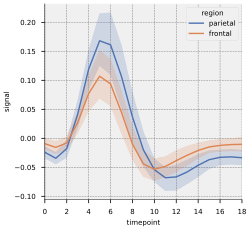

In [25]:
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", hue="region", data=fmri)

In [6]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [10]:
x = torch.tensor([
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
], dtype=torch.float32)

y = x

In [11]:
model = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    nn.Sigmoid()
)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-2)
loss_fn = torch.nn.BCELoss()

swa_model = AveragedModel(model)

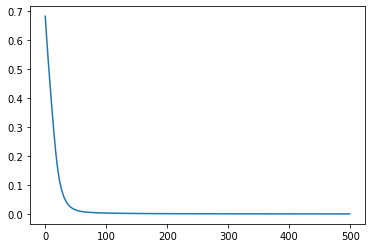

In [12]:
losses = []

for _ in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    swa_model.update_parameters(model)
    
    losses.append(loss.item())

plt.plot(losses);

In [16]:
swa_model(x)

tensor([[9.9998e-01, 1.3588e-03, 9.9837e-01],
        [4.6247e-03, 9.9987e-01, 1.1694e-04],
        [9.9561e-01, 9.9891e-01, 1.6644e-03]], grad_fn=<SigmoidBackward>)

In [14]:
torch.optim.swa_utils.update_bn(x, swa_model)